# Covid-19 Trends Predictions

**As a Data Scientist you will login with username/password provided by the data owner and perform Remote Data Science**

## Import Libraries

In [1]:
import syft as sy
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import os
import pandas as pd

%matplotlib inline

## Login to Domain Node as Data Scientist

In [2]:
ds_node = sy.login(email="zoheb@amat.com", password="bazinga", port=8081)

Connecting to None... done! 	 Logging into local_node... done!


**Lets check our initial privacy budget**

The privacy budget represents how much noise the data scientist can remove from a dataset when accessing it. Domains will set a privacy budget per data scientist.

In [3]:
ds_node.privacy_budget

500.0

## View the available datasets on the Node

In [4]:
ds_node.datasets

Idx,Name,Description,Assets,Id
[0],COVID19 Cases in 175 countries,Weekly data for an entire year,"[""Country 0""] -> Tensor[""Country 1""] -> Tensor[""Country 2""] -> Tensor...",51da7d0f-7e80-4b82-b5aa-9814a3ee9cef


## Let's get a pointer to our Dataset


In [5]:
covid_ds = ds_node.datasets[0]
covid_ds

Dataset: COVID19 Cases in 175 countries
Description: Weekly data for an entire year


 assets = my_dataset.assets 

to view receive a dictionary you can parse through using Python
(as opposed to blowing up your notebook with a massive printed table).



Asset Key,Type,Shape
"[""Country 0""]",Tensor,"(53,)"
"[""Country 1""]",Tensor,"(53,)"
"[""Country 2""]",Tensor,"(53,)"
"[""Country 3""]",Tensor,"(53,)"
"[""Country 4""]",Tensor,"(53,)"
"[""Country 5""]",Tensor,"(53,)"
"[""Country 6""]",Tensor,"(53,)"
"[""Country 7""]",Tensor,"(53,)"
"[""Country 8""]",Tensor,"(53,)"
"[""Country 9""]",Tensor,"(53,)"


**We can't see the dataset's values by printing it, hence we can't steal.**
**Here is the tensor pointer to the dataset**

In [6]:
print(covid_ds)

## Let's do an extrapolation for next 3 months on a country's dataset

### Extract the data for a country

Create `result` - a pointer to one of the selected dataset's tensors.


In [7]:
result = covid_ds["Country 0"]

`publish` uses the privacy budget approved by the data owner to access the data in a noised format that does not compromise the original dataset. `sigma` is the amount of privacy budget the data scientist plans to use.

In [8]:
published_result = result.publish(sigma=1)

We call `get()` to access the contents of the published_result pointer created above.

In [9]:
published_data = published_result.block_with_timeout(60).get()

**Check the privacy budget spent -- its decreased**

In [10]:
print(ds_node.privacy_budget)

500.0


You can request for budget from Data Owner

In [14]:
ds_node.request_budget(eps=100, reason="I want to do more data exploration")

Requested 100 epsilon of budget. Call .privacy_budget to see if your budget has arrived!


### Load the dataset portion into a Pandas dataframe.

Let's plot the noisy data. In comparison to the data visualized by data owner, it is impossible (thanks to differential privacy) to get exact same visualization, but the machine learning properties of the data remain the same.

<AxesSubplot:>

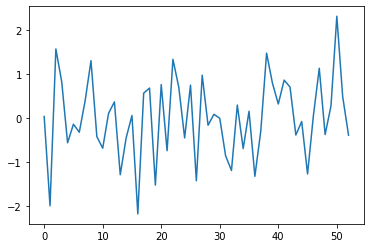

In [11]:
data_df = pd.DataFrame(published_data)
data_df.plot(legend=False)

In [12]:
def plot_extrapolated_country(idx):
    x = list(range(53))
    y = data_df.loc[:,idx].values

    plt.plot(y)
    
    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    new_y = []
    for x2 in new_points:
        new_y.append(f(53+x2))
        
    plt.plot(range(53, 65), new_y)

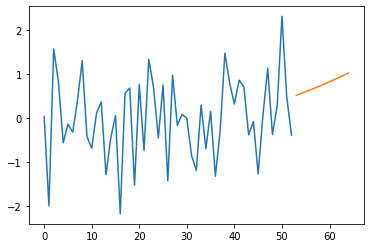

In [13]:
plot_extrapolated_country(0)

As you can see above, the data is obscured by noise, but the trends / modeling move in the expected direction.

**This is the power of Remote Data Science. We're able to work with and get the benefits of data, without directly owning it, or exposing the privacy of the subjects whose data was collected.**